Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/dataset.csv')

Data Exploration

In [3]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   AWND     1823 non-null   float64
 4   PGTM     62 non-null     float64
 5   PRCP     1827 non-null   float64
 6   TAVG     0 non-null      float64
 7   TMAX     1827 non-null   int64  
 8   TMIN     1827 non-null   int64  
 9   WDF2     1822 non-null   float64
 10  WDF5     1809 non-null   float64
 11  WSF2     1823 non-null   float64
 12  WSF5     1809 non-null   float64
 13  WT01     551 non-null    float64
 14  WT02     39 non-null     float64
 15  WT08     861 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 228.5+ KB


In [5]:
df.shape

(1827, 16)

In [6]:
df['PRCP'].values[df['PRCP'].values > 0] = 1

In [7]:
df.PRCP.value_counts()

0.0    1660
1.0     167
Name: PRCP, dtype: int64

In [8]:
df.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PGTM       1765
PRCP          0
TAVG       1827
TMAX          0
TMIN          0
WDF2          5
WDF5         18
WSF2          4
WSF5         18
WT01       1276
WT02       1788
WT08        966
dtype: int64

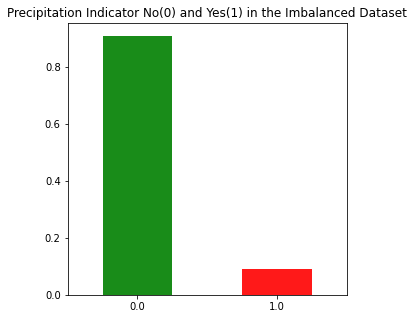

In [9]:
fig = plt.figure(figsize = (5,5))
df.PRCP.value_counts(normalize = True).plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('Precipitation Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

Most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. Therefore we need to balance data.

Handling Class Imbalance For Precipitation Prediction


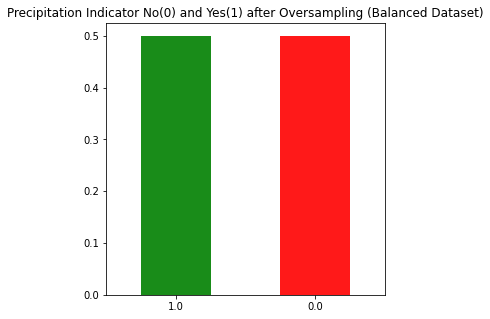

In [10]:
from sklearn.utils import resample

no = df[df.PRCP == 0.0]
yes = df[df.PRCP == 1.0]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (5,5))
oversampled.PRCP.value_counts(normalize = True).plot(kind='bar', color= ['green','red'], alpha = 0.9, rot=0)
plt.title('Precipitation Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

Handling missing values.

In [11]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
TAVG,3320,1.000000
WT02,3257,0.981024
PGTM,3237,0.975000
WT08,2021,0.608735
WT01,1599,0.481627


Dropping TAVG, WT02 and PGTM because of many missing values

In [12]:
oversampled = oversampled.drop(['TAVG', 'WT02', 'PGTM'], axis = 1)

Impute columns with mode

In [13]:
oversampled.isnull().sum()

STATION       0
NAME          0
DATE          0
AWND          4
PRCP          0
TMAX          0
TMIN          0
WDF2          5
WDF5         40
WSF2          4
WSF5         40
WT01       1599
WT08       2021
dtype: int64

In [14]:
oversampled['WT08'] = oversampled['WT08'].fillna(oversampled['WT08'].mode()[0])
oversampled['WT01'] = oversampled['WT01'].fillna(oversampled['WT01'].mode()[0])
oversampled['AWND'] = oversampled['AWND'].fillna(oversampled['AWND'].mode()[0])
oversampled['WDF2'] = oversampled['WDF2'].fillna(oversampled['WDF2'].mode()[0])
oversampled['WDF5'] = oversampled['WDF5'].fillna(oversampled['WDF5'].mode()[0])
oversampled['WSF2'] = oversampled['WSF2'].fillna(oversampled['WSF2'].mode()[0])
oversampled['WSF5'] = oversampled['WSF5'].fillna(oversampled['WSF5'].mode()[0])

In [15]:
oversampled.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,1.0,1.0
7,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-08,2.24,0.0,62,44,280.0,340.0,8.1,16.1,1.0,1.0
8,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-09,1.12,0.0,60,46,90.0,100.0,6.0,10.1,1.0,1.0


Convert categorical features to continuous features with Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder

lencoders = {}

for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [17]:
oversampled.shape

(3320, 13)

In [18]:
oversampled.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,0,0,0,2.46,0.0,64,43,10.0,30.0,8.1,11.0,1.0,1.0
1,0,0,1,2.01,0.0,65,47,270.0,30.0,6.0,8.9,1.0,1.0
2,0,0,2,0.67,0.0,62,44,150.0,150.0,10.1,14.1,1.0,1.0
7,0,0,7,2.24,0.0,62,44,280.0,340.0,8.1,16.1,1.0,1.0
8,0,0,8,1.12,0.0,60,46,90.0,100.0,6.0,10.1,1.0,1.0


Standardizing data

In [19]:
from sklearn import preprocessing

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(oversampled)
modified_data = pd.DataFrame(r_scaler.transform(oversampled), index=oversampled.index, columns=oversampled.columns)

Feature Importance using Filter Method (Chi-Square)

In [20]:
from sklearn.feature_selection import SelectKBest, chi2

X = modified_data.loc[:,modified_data.columns!='PRCP']
y = modified_data[['PRCP']]

selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)

print(X.columns[selector.get_support(indices=True)])

Index(['DATE', 'AWND', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01',
       'WT08'],
      dtype='object')


In [21]:
features = oversampled[['STATION', 'AWND', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01',
       'WT08']]
target = oversampled['PRCP']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

Training Precipitation Model with different models

In [23]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [24]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
 
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))

    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc

Logistic Regression

Accuracy = 0.858433734939759
ROC Area under Curve = 0.8585737615677735
              precision    recall  f1-score   support

         0.0    0.87736   0.83533   0.85583       334
         1.0    0.84104   0.88182   0.86095       330

    accuracy                        0.85843       664
   macro avg    0.85920   0.85857   0.85839       664
weighted avg    0.85931   0.85843   0.85837       664



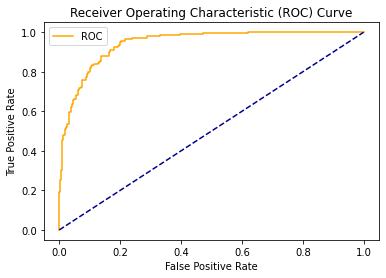

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


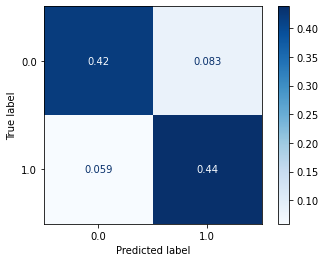

In [25]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model_lr, accuracy_lr, roc_auc_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Decision Tree

Accuracy = 0.9713855421686747
ROC Area under Curve = 0.971556886227545
              precision    recall  f1-score   support

         0.0    1.00000   0.94311   0.97072       334
         1.0    0.94556   1.00000   0.97202       330

    accuracy                        0.97139       664
   macro avg    0.97278   0.97156   0.97137       664
weighted avg    0.97294   0.97139   0.97137       664



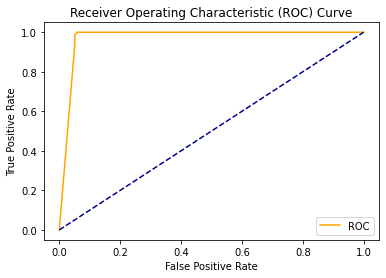

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


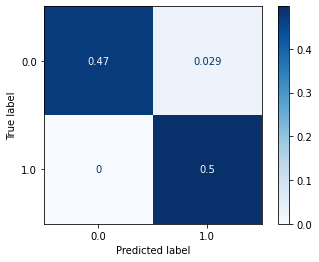

In [26]:
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(max_depth = 16, max_features = "sqrt")
model_dt, accuracy_dt, roc_auc_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Random Forest

Accuracy = 0.9849397590361446
ROC Area under Curve = 0.9850299401197604
              precision    recall  f1-score   support

         0.0    1.00000   0.97006   0.98480       334
         1.0    0.97059   1.00000   0.98507       330

    accuracy                        0.98494       664
   macro avg    0.98529   0.98503   0.98494       664
weighted avg    0.98538   0.98494   0.98494       664



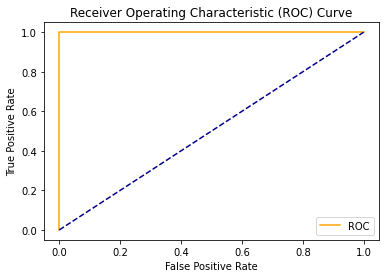

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


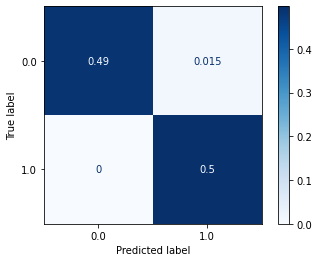

In [27]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(max_depth = 16, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 123)
model_rf, accuracy_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

XGBoost

Accuracy = 0.9774096385542169
ROC Area under Curve = 0.9775449101796407
              precision    recall  f1-score   support

         0.0    1.00000   0.95509   0.97703       334
         1.0    0.95652   1.00000   0.97778       330

    accuracy                        0.97741       664
   macro avg    0.97826   0.97754   0.97740       664
weighted avg    0.97839   0.97741   0.97740       664



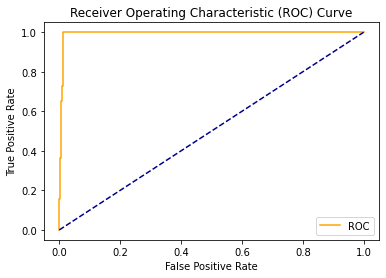

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


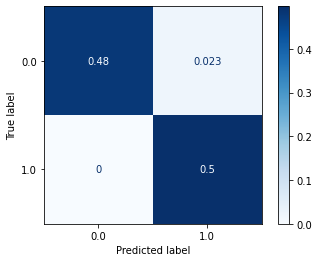

In [28]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(n_estimators = 500, max_depth = 16)
model_xgb, accuracy_xgb, roc_auc_xgb= run_model(model_xgb, X_train, y_train, X_test, y_test)

Neural Network

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy = 0.8780120481927711
ROC Area under Curve = 0.8782162946833605
              precision    recall  f1-score   support

         0.0    0.90675   0.84431   0.87442       334
         1.0    0.85269   0.91212   0.88141       330

    accuracy                        0.87801       664
   macro avg    0.87972   0.87822   0.87791       664
weighted avg    0.87988   0.87801   0.87789       664



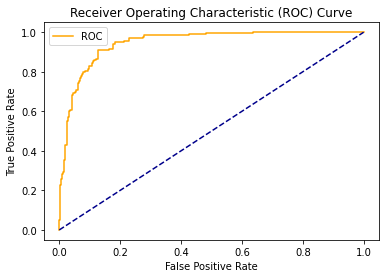

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


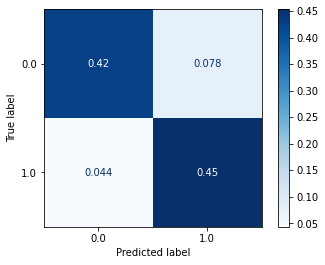

In [29]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(hidden_layer_sizes = (20,30,30,20), activation = 'logistic', solver = 'lbfgs', max_iter = 1000)
model_nn, accuracy_nn, roc_auc_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

Precipitation Prediction Model Comparison

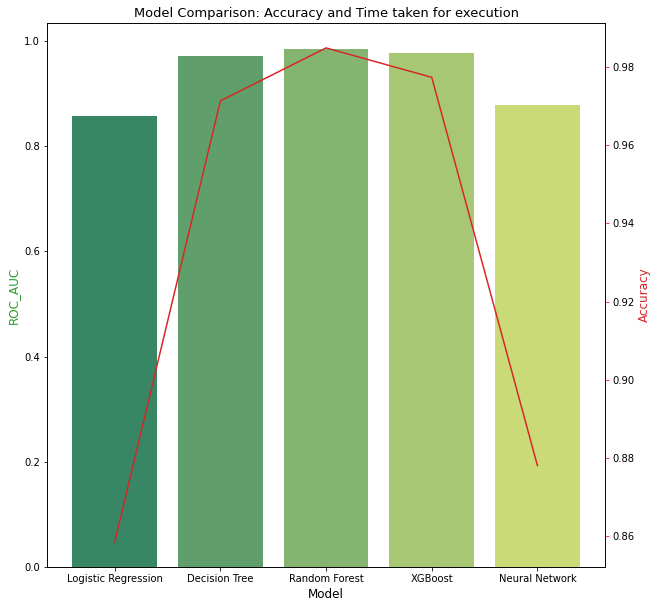

In [30]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb, accuracy_nn,]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb, roc_auc_nn]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost','Neural Network'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(10,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('ROC_AUC', fontsize=12, color=color)
ax2 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=12, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)